# **House Price Prediction**

GOAL- It is your job to predict the sales price for each house. For each Id in the test set, you must predict the value of the SalePrice variable. 

IMPORT ALL THE IMPORTANT LIBARIES

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [3]:
df = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

**#1 find null values and plot graphs**

In [5]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)


,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


**#2 check distribution of salesprice**

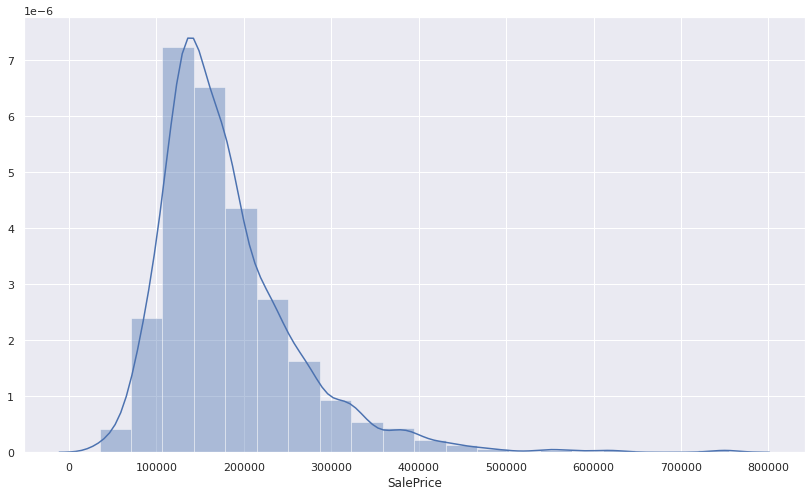

In [6]:
sns.set(rc= {'figure.figsize':(14,8)})
sns.distplot(df['SalePrice'], bins = 20)

In [7]:
#skewness and kurtosis
print("Skewness: %f" % df['SalePrice'].skew())
print("Kurtosis: %f" % df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


In [8]:
#dealing with missing data
df = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df = df.drop(df.loc[df['Electrical'].isnull()].index)
df.isnull().sum().max() #just checking that there's no missing data missing...

0

**#3 find out correlation wrt saleprice to know important feature.
only numeric feature can draw heatmap**

In [9]:
numericf=df.select_dtypes(include=[np.number])
numericf.columns

Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [10]:
categorialf=df.select_dtypes(include=[np.object])
categorialf.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [11]:
corelation = numericf.corr()
print(corelation['SalePrice'].sort_values(ascending= False))

SalePrice        1.000000
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
YearRemodAdd     0.507430
Fireplaces       0.466968
BsmtFinSF1       0.386436
WoodDeckSF       0.324422
2ndFlrSF         0.319464
OpenPorchSF      0.315831
HalfBath         0.284400
LotArea          0.263837
BsmtFullBath     0.227082
BsmtUnfSF        0.214446
BedroomAbvGr     0.168235
ScreenPorch      0.111419
PoolArea         0.092397
MoSold           0.046380
3SsnPorch        0.044571
BsmtFinSF2      -0.011412
BsmtHalfBath    -0.016873
MiscVal         -0.021200
Id              -0.021756
LowQualFinSF    -0.025620
YrSold          -0.028907
OverallCond     -0.077924
MSSubClass      -0.084230
EnclosedPorch   -0.128627
KitchenAbvGr    -0.135935
Name: SalePrice, dtype: float64


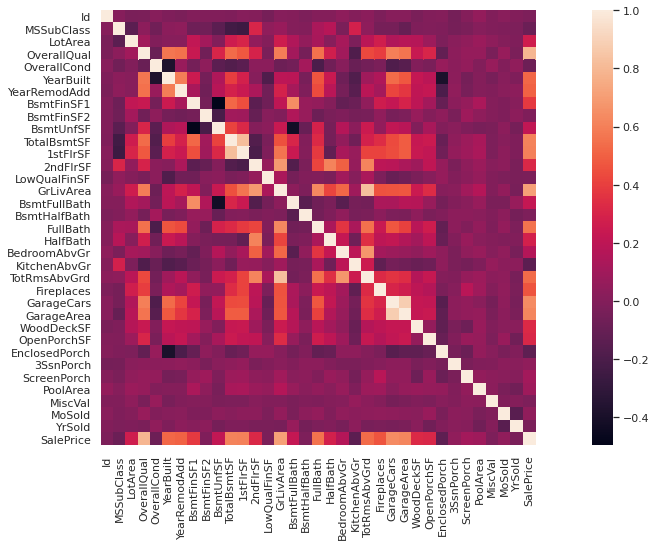

In [12]:
sns.set(rc= {'figure.figsize':(20,8)})

sns.heatmap(corelation, square = True)

DROP THE UNWANTED FEATURE BY SEEING ITS COREATION

In [13]:
cols = corelation.nlargest(11,'SalePrice')
pd.DataFrame(cols)
maincorr = cols.index
list(maincorr)


['SalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 '1stFlrSF',
 'FullBath',
 'TotRmsAbvGrd',
 'YearBuilt',
 'YearRemodAdd']

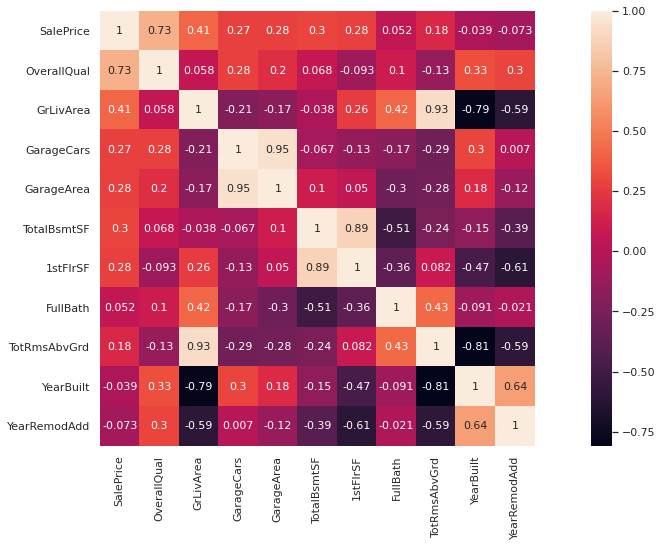

In [14]:
corr1 = np.corrcoef(cols[maincorr].values.T)
corr1
sns.heatmap(corr1, square = True , annot = True ,annot_kws={'size': 11}, xticklabels = maincorr.values , yticklabels = maincorr.values )

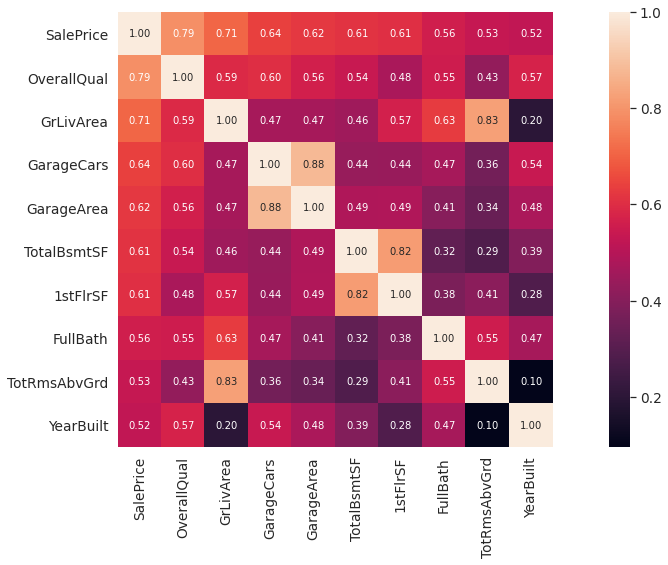

In [15]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corelation.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Garage cars and (garage area)..highly correalted..keep one of them
TotRmsAbvGrd' and ('GrLivArea'), twin brothers again
TotalBsmtSF' and '(1stFloor') also seem to be twin brothers.
***remove on basis of its corealtion with salesprice***
one which is having less corealtion with salesprice, should be romoved

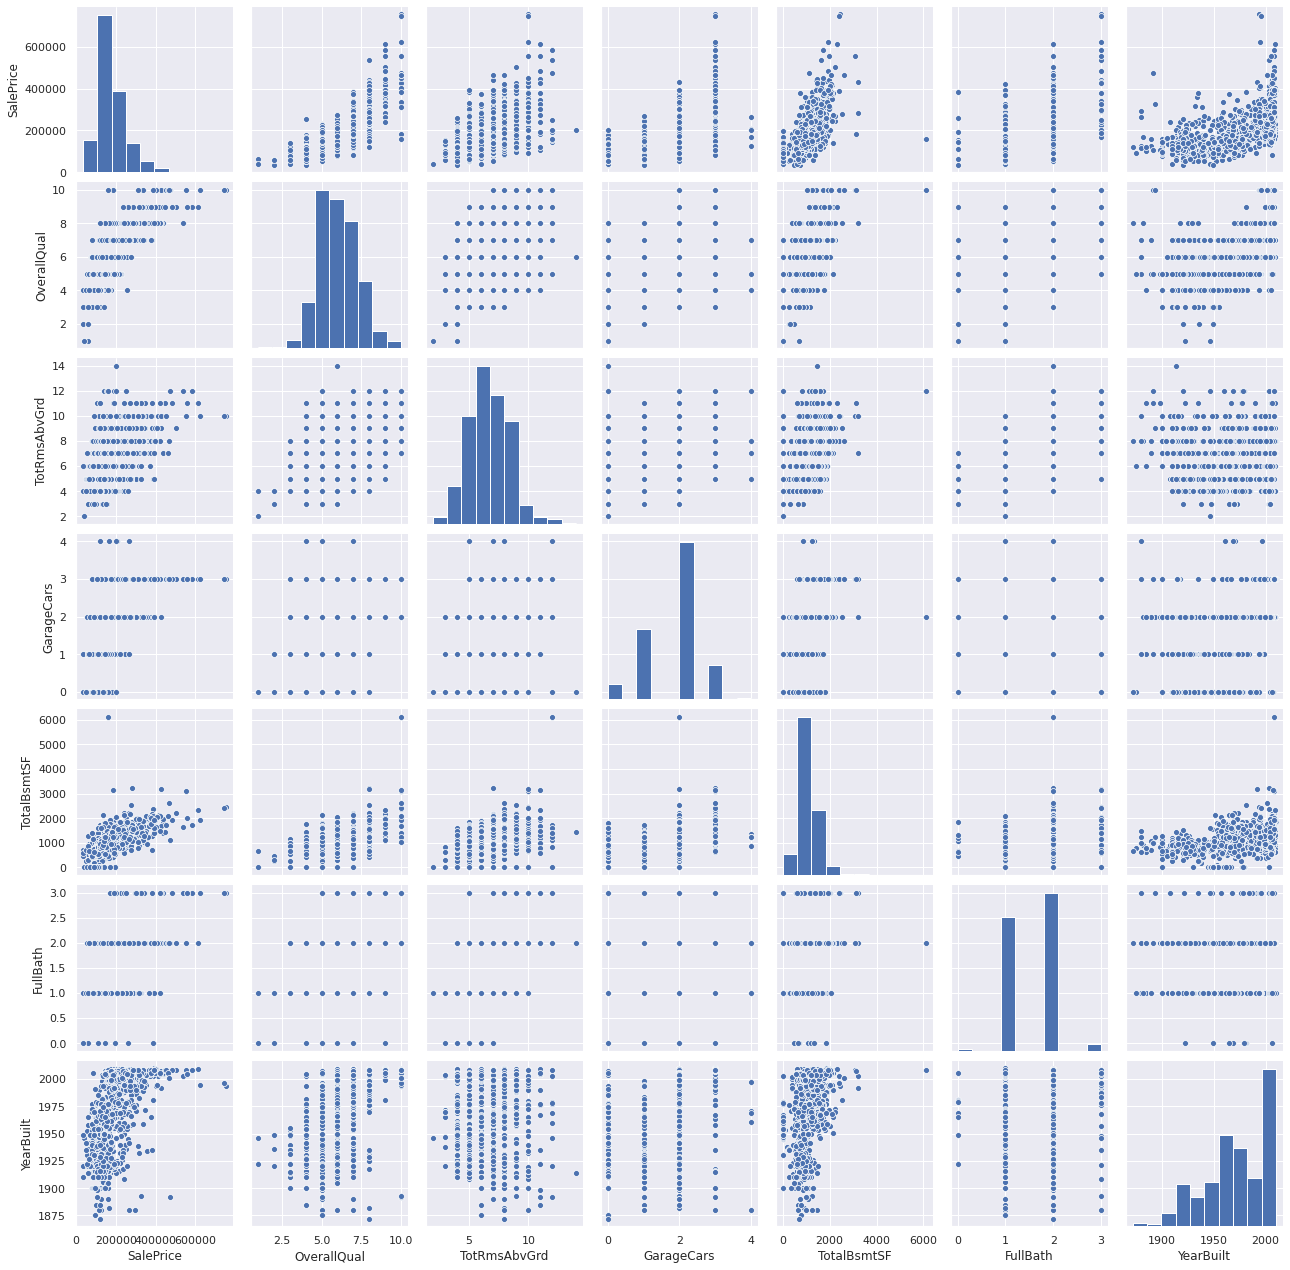

In [16]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'TotRmsAbvGrd', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

**####4 Scatter plot , it shows the CORELATION and also the outliers**
Regplot also works as scatterplots

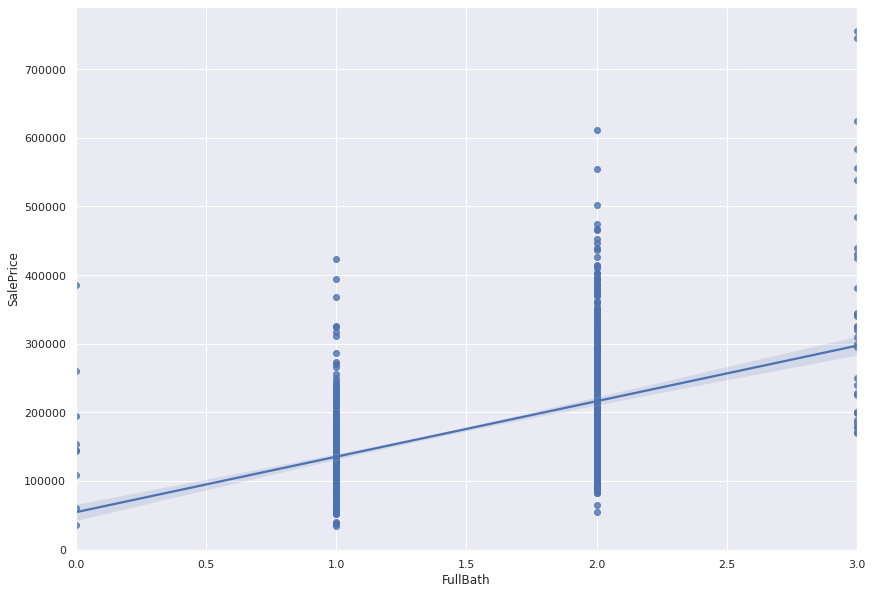

In [17]:
fig,axes = plt.subplots(figsize=(14,10))
sns.regplot(y = 'SalePrice', x = 'FullBath' , data =df ,ax=axes )

#5 BOXPLOT:

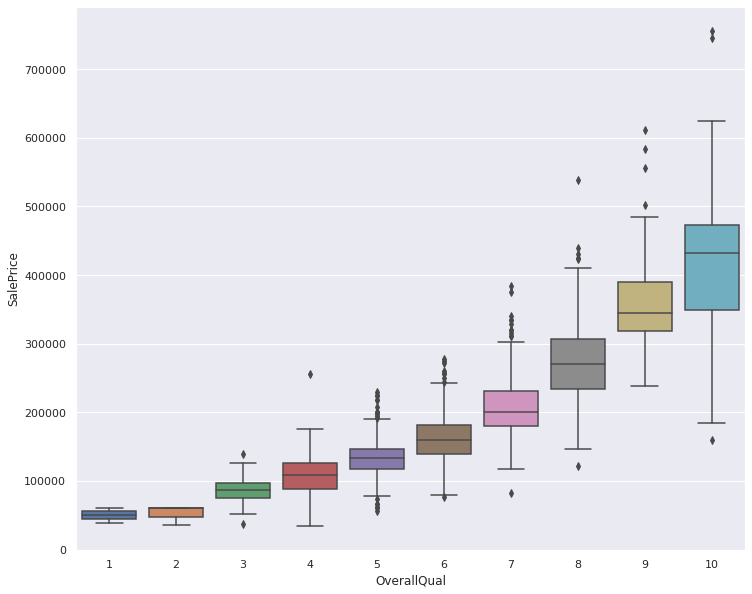

In [18]:
f,ax =  plt.subplots(figsize=(12,10))
sns.boxplot(x = 'OverallQual', y= 'SalePrice' , data = df)

**Removing outliers

(1459, 63)

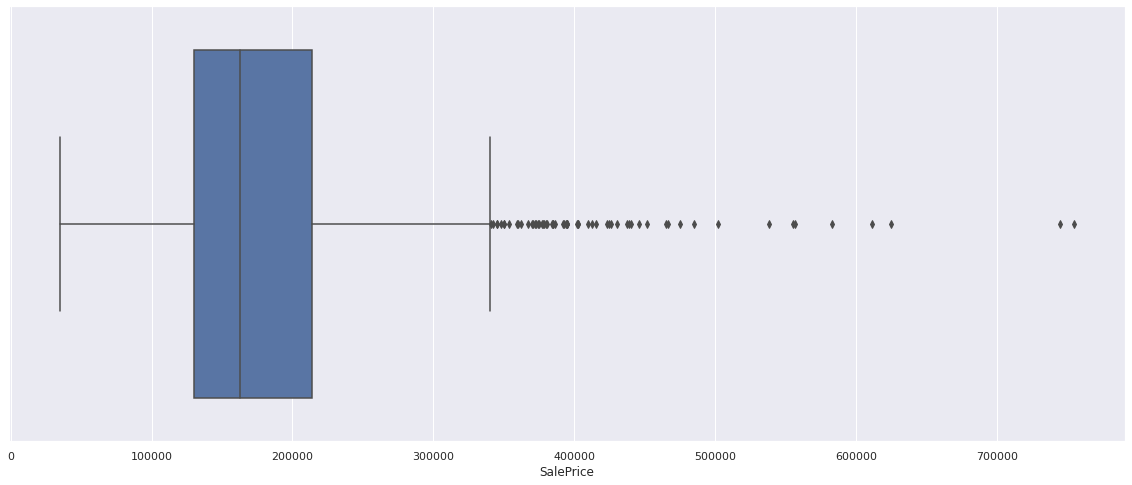

In [19]:
sns.boxplot(df['SalePrice'])
df.shape

**as we can see outliers are there

In [20]:
firstQ= df['SalePrice'].quantile(.25)
thirdQ =df['SalePrice'].quantile(.75)
IQR =  thirdQ- firstQ
max= thirdQ + 3*IQR
df[df['SalePrice']>max].index
df.drop(df[df['SalePrice']>max].index ,axis = 0, inplace = True )
df.shape

(1447, 63)

*we have droped 12 rows from saleprice*
Too much extreme value removed

(1447, 63)

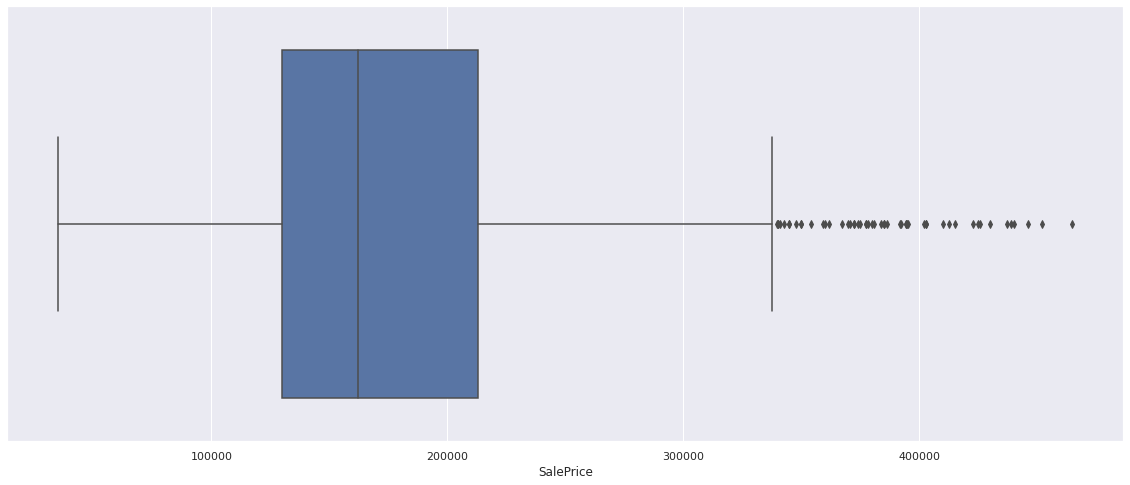

In [21]:
sns.boxplot(df['SalePrice'])
df.shape

There could be 2 way to remove outliers.
* * 1st - plot box plot and and from describe find IQR and then declare boundary as 3rd + 3*IQR

*2nd - plot scatter plot with target variable and you can observe the outlier from from plot. find its postion from particular column by sort and remove them.


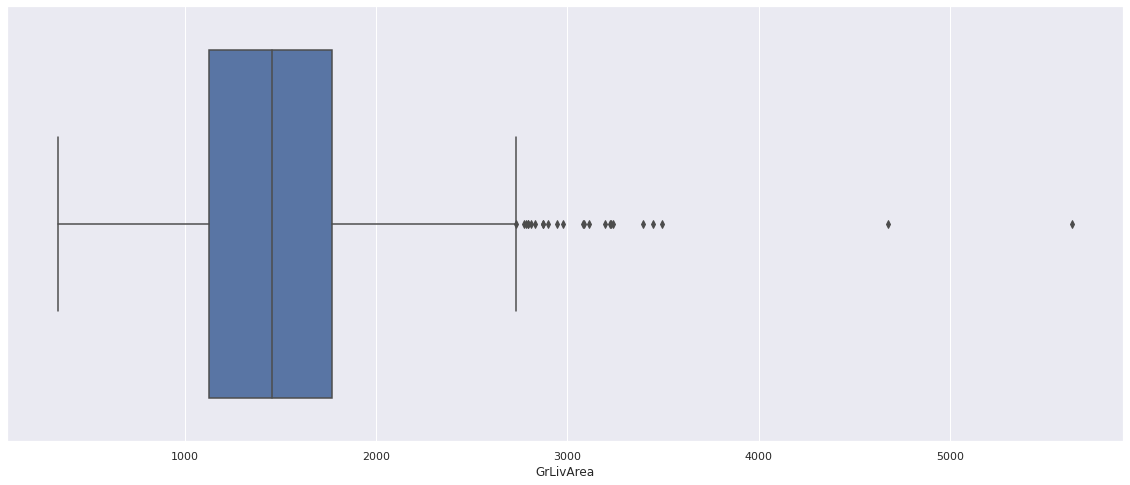

In [22]:
sns.boxplot(df['GrLivArea'])

## as i cound not implement both at a time..showing the 2nd one way..and implemnting by 1st one. both gives the same result

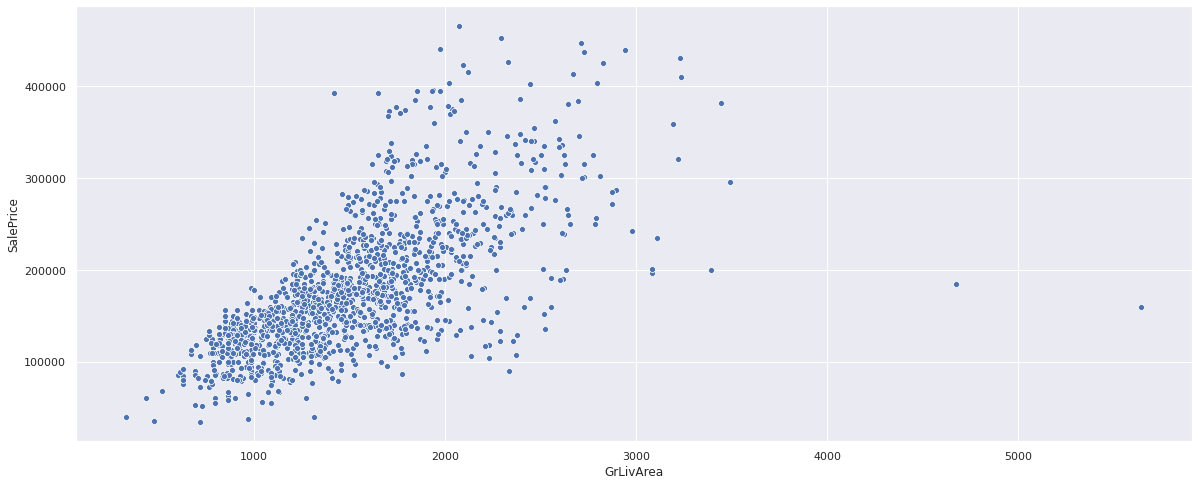

In [23]:
sns.scatterplot(x= df['GrLivArea'], y= df['SalePrice'])

In [24]:
#deleting points
x = df.sort_values(by = 'GrLivArea', ascending = False)
x['GrLivArea'].count()

1447

In [25]:
#deleting points by knwoing its positon
#df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
#df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
#df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

****implementing it by 1st one

In [26]:
fst = df['GrLivArea'].quantile(.25)
trd = df['GrLivArea'].quantile(.75)
IQR=trd - fst
df.drop(df[df['GrLivArea']>trd+ 3*IQR].index, axis = 0,inplace= True)

In [27]:
df['GrLivArea'].count()

1445

as we can see 2 extreme values removed.
***GREAT , NOW WE KNOW 2 WAYS TO DEAL WITH OUTLIERS

**NEXT SETP IS TO REMOVE SKEWNESS AND MAKE IT NORMAL DISTRIBUTION******

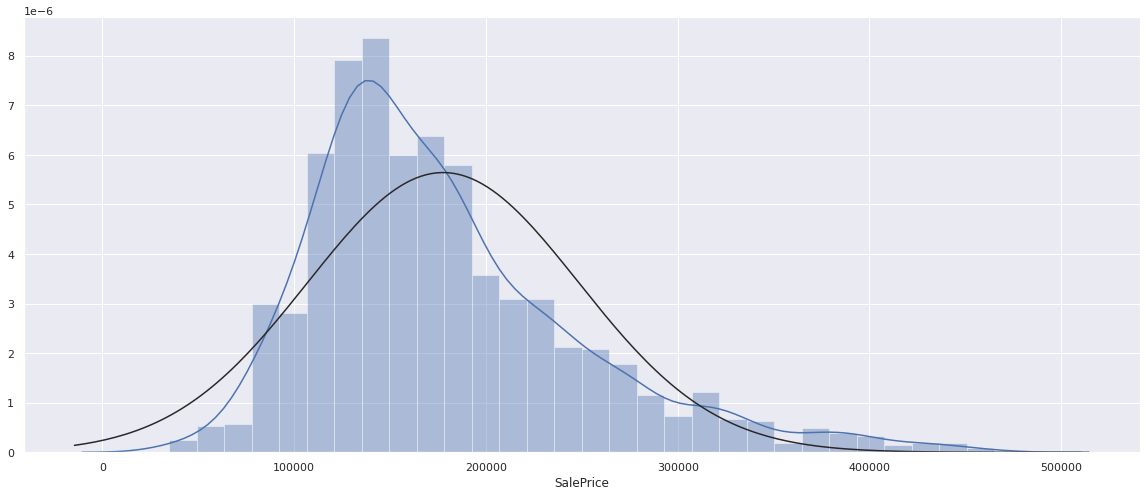

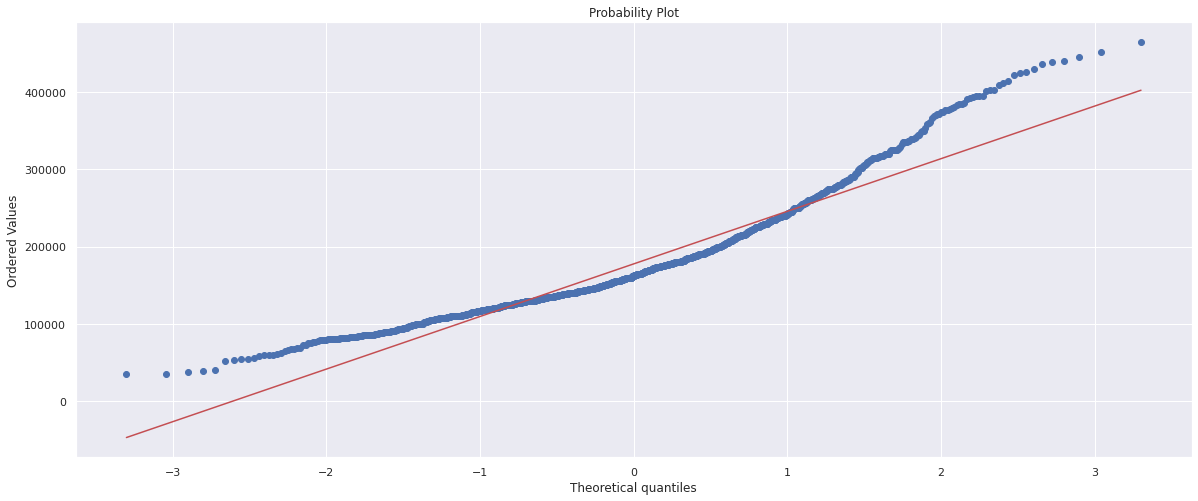

In [28]:
#histogram and normal probability plot
sns.distplot(df['SalePrice'],fit = norm)
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

AS POSITIVE SKEWNESS AND PEAK IS THERE BEST WAY IS TACKLE TO DO LOG TRANSFORMATION , AND AGAIN PLOT AND CHECK


In [29]:
#applying log transformation
df['SalePrice'] = np.log(df['SalePrice'])

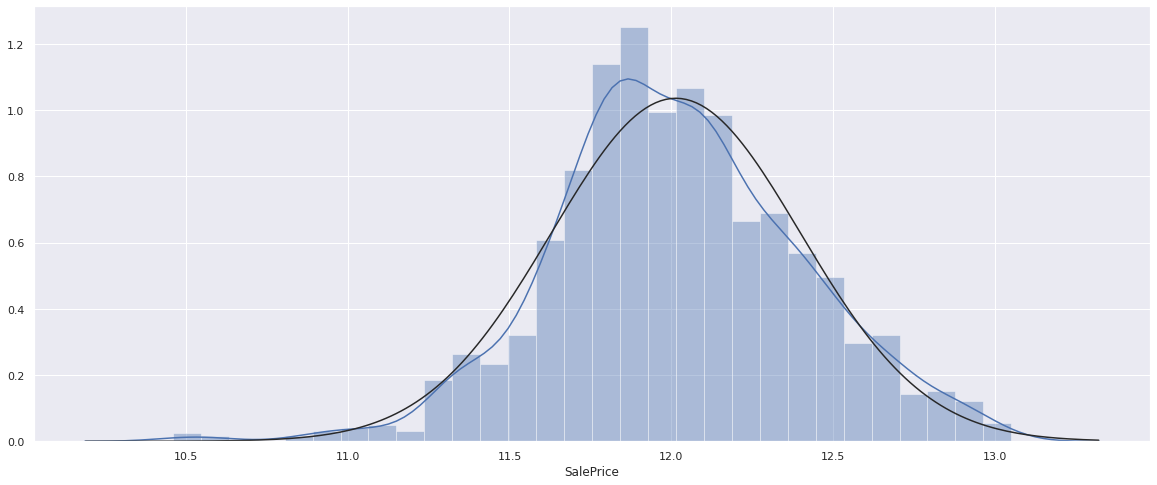

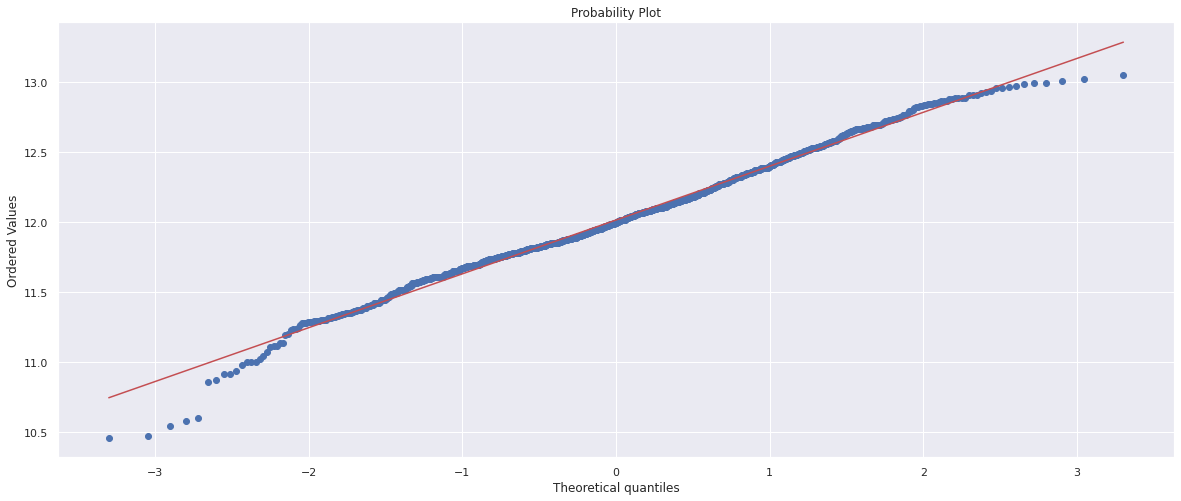

In [30]:
#transformed histogram and normal probability plot
sns.distplot(df['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)

Repeating the same steps for all the imp feature

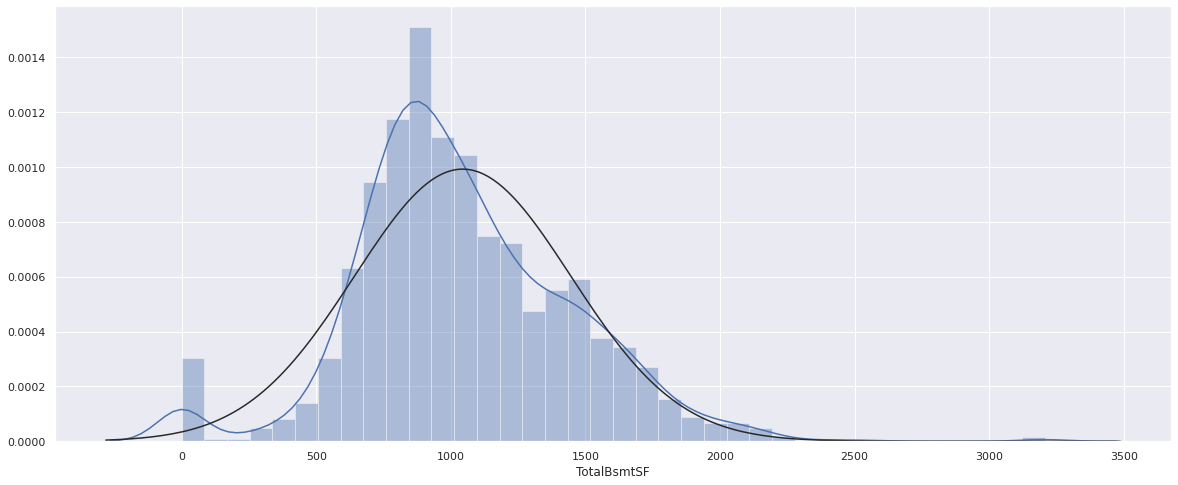

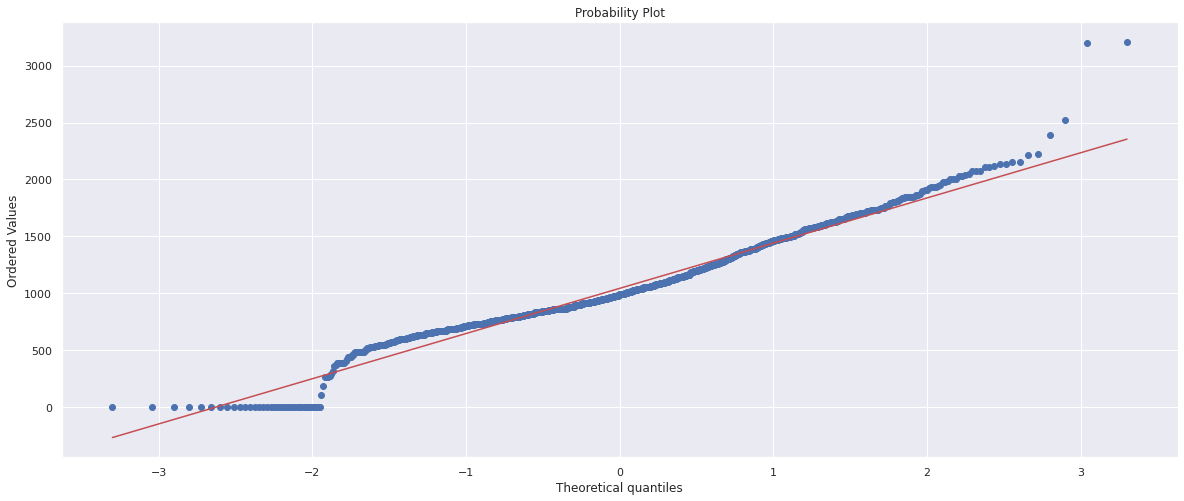

In [31]:
#histogram and normal probability plot
sns.distplot(df['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['TotalBsmtSF'], plot=plt)

** Ok, now we are dealing with the big boss. What do we have here? 
*  Something that, in general, presents skewness.
* A significant number of observations with value zero (houses without basement).
* A big problem because the value zero doesn't allow us to do log transformations.
* To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.
* I'm not sure if this approach is correct. It just seemed right to me. That's what I call 'high risk engineering

In [32]:
#create column for new variable (one is enough because it's a binary categorical feature)
#if area>0 it gets 1, for area==0 it gets 0
df['HasBsmt'] = 0 
df.loc[df['TotalBsmtSF']>0,'HasBsmt'] = 1
df['HasBsmt'].value_counts()

1    1408
0      37
Name: HasBsmt, dtype: int64

In [33]:
#transform data
df.loc[df['HasBsmt']==1,'TotalBsmtSF'] = np.log(df['TotalBsmtSF'])

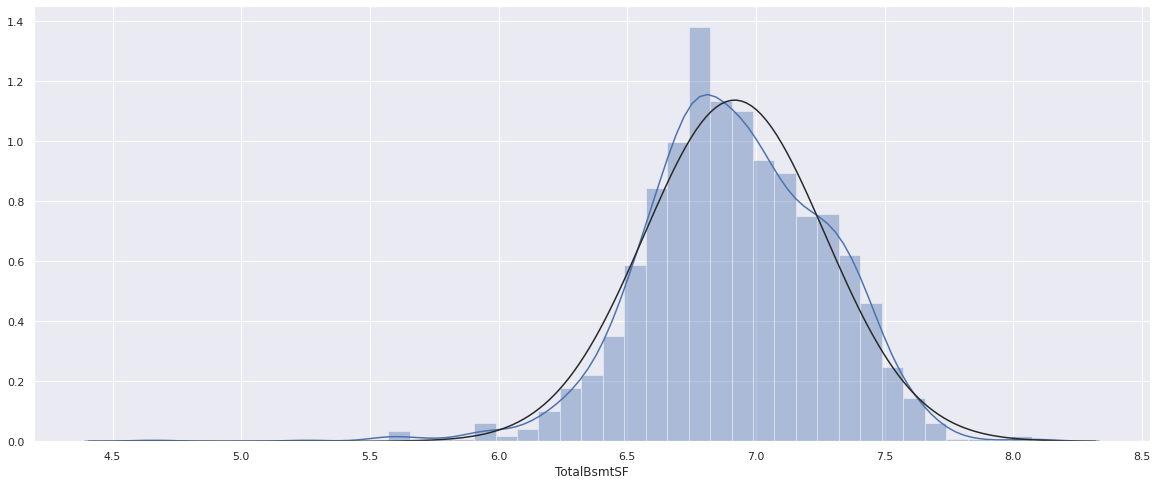

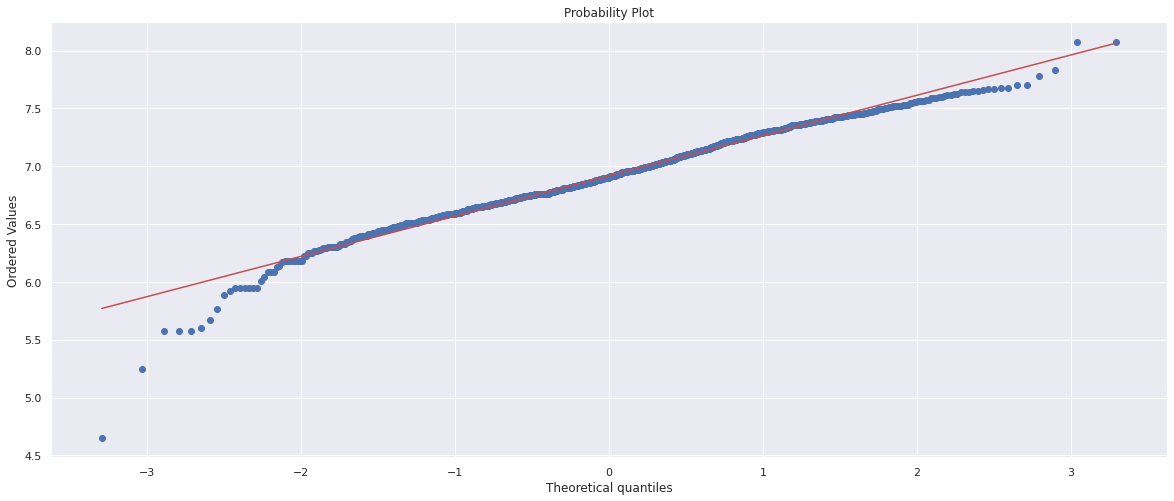

In [34]:
#histogram and normal probability plot
sns.distplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df[df['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

In [35]:
df.head(2)

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,HasBsmt
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2,2008,WD,Normal,12.247694,1
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,5,2007,WD,Normal,12.109011,1


NOw lets create dummy variable or we can say one hot encoding to convert all into numeric data

In [36]:
#convert categorical variable into dummy
df= pd.get_dummies(df)

In [37]:
df.head(5)

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,8450,7,5,2003,2003,706,0,150,...,0,0,0,1,0,0,0,0,1,0
1,2,20,9600,6,8,1976,1976,978,0,284,...,0,0,0,1,0,0,0,0,1,0
2,3,60,11250,7,5,2001,2002,486,0,434,...,0,0,0,1,0,0,0,0,1,0
3,4,70,9550,7,5,1915,1970,216,0,540,...,0,0,0,1,1,0,0,0,0,0
4,5,60,14260,8,5,2000,2000,655,0,490,...,0,0,0,1,0,0,0,0,1,0


222 columns thats too much...lets remove unneccesary columns again by taking correlation and keeping only useful or the ones which create the impact

In [38]:
main =df.corr()
cols = main.nlargest(20,'SalePrice')
y=cols.index
y

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'YearBuilt', 'FullBath', 'YearRemodAdd', 'ExterQual_Gd',
       'Foundation_PConc', 'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC_Ex',
       'KitchenQual_Gd', 'BsmtFinSF1', 'TotalBsmtSF', 'KitchenQual_Ex',
       'CentralAir_Y', 'Exterior2nd_VinylSd'],
      dtype='object')

In [39]:
df = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       '1stFlrSF', 'YearBuilt','FullBath','YearRemodAdd', 'ExterQual_Gd',
       'Foundation_PConc', 'TotRmsAbvGrd', 'Fireplaces', 'HeatingQC_Ex',
       'KitchenQual_Gd', 'BsmtFinSF1', 'TotalBsmtSF', 'KitchenQual_Ex',
       'CentralAir_Y', 'Exterior2nd_VinylSd']]
df.head(5)


,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,1stFlrSF,YearBuilt,FullBath,YearRemodAdd,ExterQual_Gd,Foundation_PConc,TotRmsAbvGrd,Fireplaces,HeatingQC_Ex,KitchenQual_Gd,BsmtFinSF1,TotalBsmtSF,KitchenQual_Ex,CentralAir_Y,Exterior2nd_VinylSd
0,12.247694,7,1710,2,548,856,2003,2,2003,1,1,8,0,1,1,706,6.752270,0,1,1
1,12.109011,6,1262,2,460,1262,1976,2,1976,0,0,6,1,1,0,978,7.140453,0,1,0
2,12.317167,7,1786,2,608,920,2001,2,2002,1,1,6,1,1,1,486,6.824374,0,1,1
3,11.849398,7,1717,3,642,961,1915,1,1970,0,0,7,1,0,1,216,6.628041,0,1,0
4,12.429216,8,2198,3,836,1145,2000,2,2000,1,1,9,1,1,1,655,7.043160,0,1,1


*****NOW LETS TRAIN OUR MODEL******

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('SalePrice', axis=1), df['SalePrice'], test_size=0.3, random_state=101)

In [41]:
# we are going to scale to data

y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
y_train = sc_X.fit_transform(y_train)
y_test = sc_y.fit_transform(y_test)

In [42]:
X_train

array([[ 0.69928075,  0.27338351,  0.34749469, ..., -0.25560111,
         0.26641054, -0.72766803],
       [-0.79854306, -0.68209983,  0.34749469, ..., -0.25560111,
         0.26641054, -0.72766803],
       [-0.04963115, -0.29074718, -2.32411851, ..., -0.25560111,
         0.26641054, -0.72766803],
       ...,
       [ 0.69928075, -0.61340495,  0.34749469, ..., -0.25560111,
         0.26641054, -0.72766803],
       [ 1.44819265,  0.15889204,  1.6833013 , ..., -0.25560111,
         0.26641054,  1.37425304],
       [-0.04963115,  0.38995664,  0.34749469, ..., -0.25560111,
         0.26641054,  1.37425304]])

*****LETS CREATE LINEAR REGRESSION MODEL****

In [43]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
print(lm)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [44]:
# print the intercept
print(lm.intercept_)

[-7.22693258e-16]


In [45]:
print(lm.coef_)

[[ 0.27900096  0.31949904  0.0696441   0.06326726  0.06824532  0.13003763
  -0.01020843  0.07036437 -0.02575147  0.02070306 -0.00505655  0.07633834
   0.03673436  0.04279772  0.14174303  0.06235863  0.0530389   0.0648555
   0.00257727]]


In [46]:
predictions = lm.predict(X_test)
predictions= predictions.reshape(-1,1)

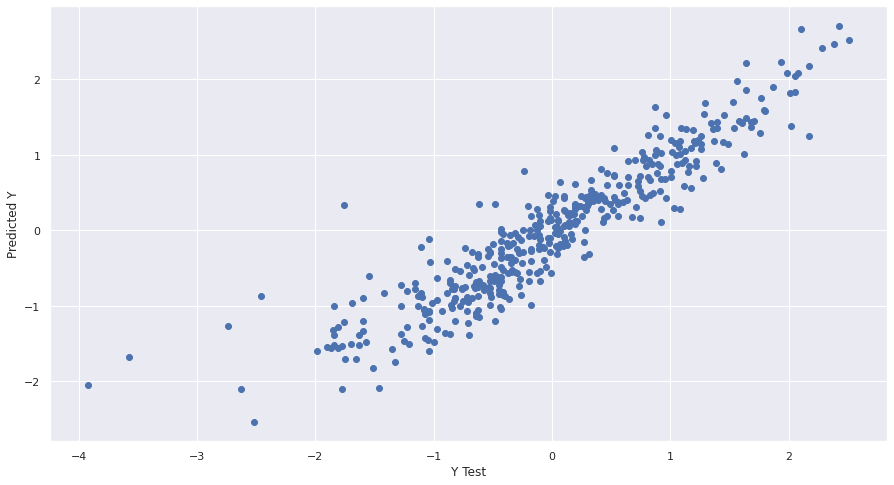

In [47]:
plt.figure(figsize=(15,8))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

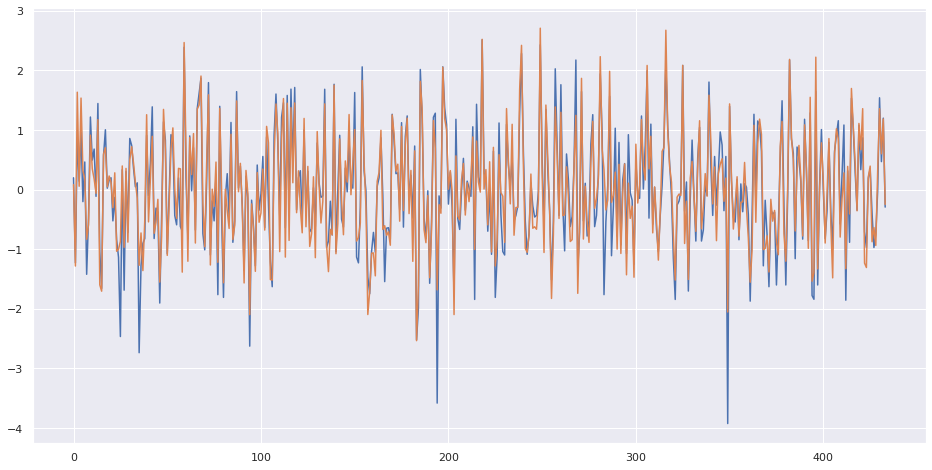

In [48]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label ='Test')
plt.plot(predictions, label = 'predict')
plt.show()


Regression Evaluation Metrics
Here are three common evaluation metrics for regression problems:

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

1𝑛∑𝑖=1𝑛|𝑦𝑖−𝑦̂ 𝑖|

Mean Squared Error (MSE) is the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)2

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

1𝑛∑𝑖=1𝑛(𝑦𝑖−𝑦̂ 𝑖)

Comparing these metrics:

MAE is the easiest to understand, because it's the average error. MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world. RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units. All of these are loss functions, because we want to minimize them.

In [49]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.26657309072926766
MSE: 0.13815322099104282
RMSE: 0.37168968372964406


With such a simple model, we are getting preety good accuracy and less error. WE can improve it more by choosing some advance model and hyperparameter tuning